<a href="https://colab.research.google.com/github/Ashika-A/data-science/blob/main/financial_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [ ]:
! pip install kaggle                #Importing kaggle library to colab python

! mkdir ~/.kaggle                   #Make a kaggle directory in Colab

! cp kaggle.json ~/.kaggle/         #Copy the uploaded kaggle.json to this kaggle directory in colab

! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!  kaggle datasets download -d sbhatti/financial-sentiment-analysis

  0% 0.00/276k [00:00<?, ?B/s]
100% 276k/276k [00:00<00:00, 95.7MB/s]


In [ ]:
! unzip /content/financial-sentiment-analysis.zip

Archive:  /content/financial-sentiment-analysis.zip
  inflating: data.csv                


In [ ]:
df=pd.read_csv("data.csv")

In [ ]:
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [ ]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

In [ ]:
data_pos = df[df['Sentiment'] == 'positive']
data_neg = df[df['Sentiment'] == 'negative']

In [ ]:
data_pos

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
2,"For the last quarter of 2010 , Componenta 's n...",positive
5,$SPY wouldn't be surprised to see a green close,positive
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
10,Circulation revenue has increased by 5 % in Fi...,positive
...,...,...
5819,Last month we added to our $GILD position and ...,positive
5824,`` In the newly formed company YIT Stavo the l...,positive
5825,Friends Life lifts profits 38% and hikes divi ...,positive
5836,Daily Mail parent company in talks with potent...,positive


In [ ]:
data_neg

,Sentence,Sentiment
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
11,$SAP Q1 disappoints as #software licenses down...,negative
39,$AAPL afternoon selloff as usual will be bruta...,negative
...,...,...
5829,"$SBUX down PM, from $DB downgrade.. PT cut fro...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative


In [ ]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [ ]:
dataset = pd.concat([data_pos, data_neg])

In [ ]:
dataset['Sentence']=dataset['Sentence'].str.lower()
dataset['Sentence'].tail()

5829    $sbux down pm, from $db downgrade.. pt cut fro...
5831    finnish developer and manufacturer of mobile p...
5832    operating profit fell to eur 38.1 mn from eur ...
5835    hsbc says unit to book $585 million charge on ...
5837    rising costs have forced packaging producer hu...
Name: Sentence, dtype: object

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
                'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
                'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
                'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
                'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
                's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some',
                'such','t', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
                'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
                'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
                "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
STOPWORDS = set(stopwordlist)

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

dataset['Sentence'] = dataset['Sentence'].apply(lambda text: cleaning_stopwords(text))

dataset['Sentence'].head()

0     geosolutions technology leverage benefon 's gp...
2     last quarter 2010 , componenta 's net sales do...
5               $spy wouldn't surprised see green close
8     kone 's net sales rose 14 % year-on-year first...
10    circulation revenue increased 5 % finland 4 % ...
Name: Sentence, dtype: object

In [ ]:
import string

english_punctuations = string.punctuation

punctuations_list = english_punctuations

def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

dataset['Sentence']= dataset['Sentence'].apply(lambda x: cleaning_punctuations(x))

dataset['Sentence'].tail()

5829                    sbux pm db downgrade pt cut 70 64
5831    finnish developer manufacturer mobile phone ch...
5832    operating profit fell eur 381 mn eur 553 mn 2007 
5835    hsbc says unit book 585 million charge settlement
5837    rising costs forced packaging producer huhtama...
Name: Sentence, dtype: object

In [ ]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

dataset['Sentence'] = dataset['Sentence'].apply(lambda x: cleaning_repeating_char(x))

dataset['Sentence'].tail()

5829                    sbux pm db downgrade pt cut 70 64
5831    finnish developer manufacturer mobile phone ch...
5832     operating profit fell eur 31 mn eur 553 mn 2007 
5835    hsbc says unit book 585 million charge settlement
5837    rising costs forced packaging producer huhtama...
Name: Sentence, dtype: object

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

dataset['Sentence'] = dataset['Sentence'].apply(lambda x: cleaning_URLs(x))

dataset['Sentence'].tail()

5829                    sbux pm db downgrade pt cut 70 64
5831    finnish developer manufacturer mobile phone ch...
5832     operating profit fell eur 31 mn eur 553 mn 2007 
5835    hsbc says unit book 585 million charge settlement
5837    rising costs forced packaging producer huhtama...
Name: Sentence, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

dataset['Sentence'] = dataset['Sentence'].apply(lambda x: cleaning_numbers(x))

dataset['Sentence'].tail()

5829                        sbux pm db downgrade pt cut  
5831    finnish developer manufacturer mobile phone ch...
5832              operating profit fell eur  mn eur  mn  
5835       hsbc says unit book  million charge settlement
5837    rising costs forced packaging producer huhtama...
Name: Sentence, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['Sentence'] = dataset['Sentence'].apply(tokenizer.tokenize)
dataset['Sentence'].head()

0     [w, w]
2         []
5        [w]
8         []
10       [w]
Name: Sentence, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['Sentence']= dataset['Sentence'].apply(lambda x: stemming_on_text(x))
dataset['Sentence'].head()

0     [w, w]
2         []
5        [w]
8         []
10       [w]
Name: Sentence, dtype: object

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['Sentence'] = dataset['Sentence'].apply(lambda x: lemmatizer_on_text(x))
dataset['Sentence'].head()

0     [w, w]
2         []
5        [w]
8         []
10       [w]
Name: Sentence, dtype: object

In [ ]:
X=df.Sentence
y=df.Sentiment

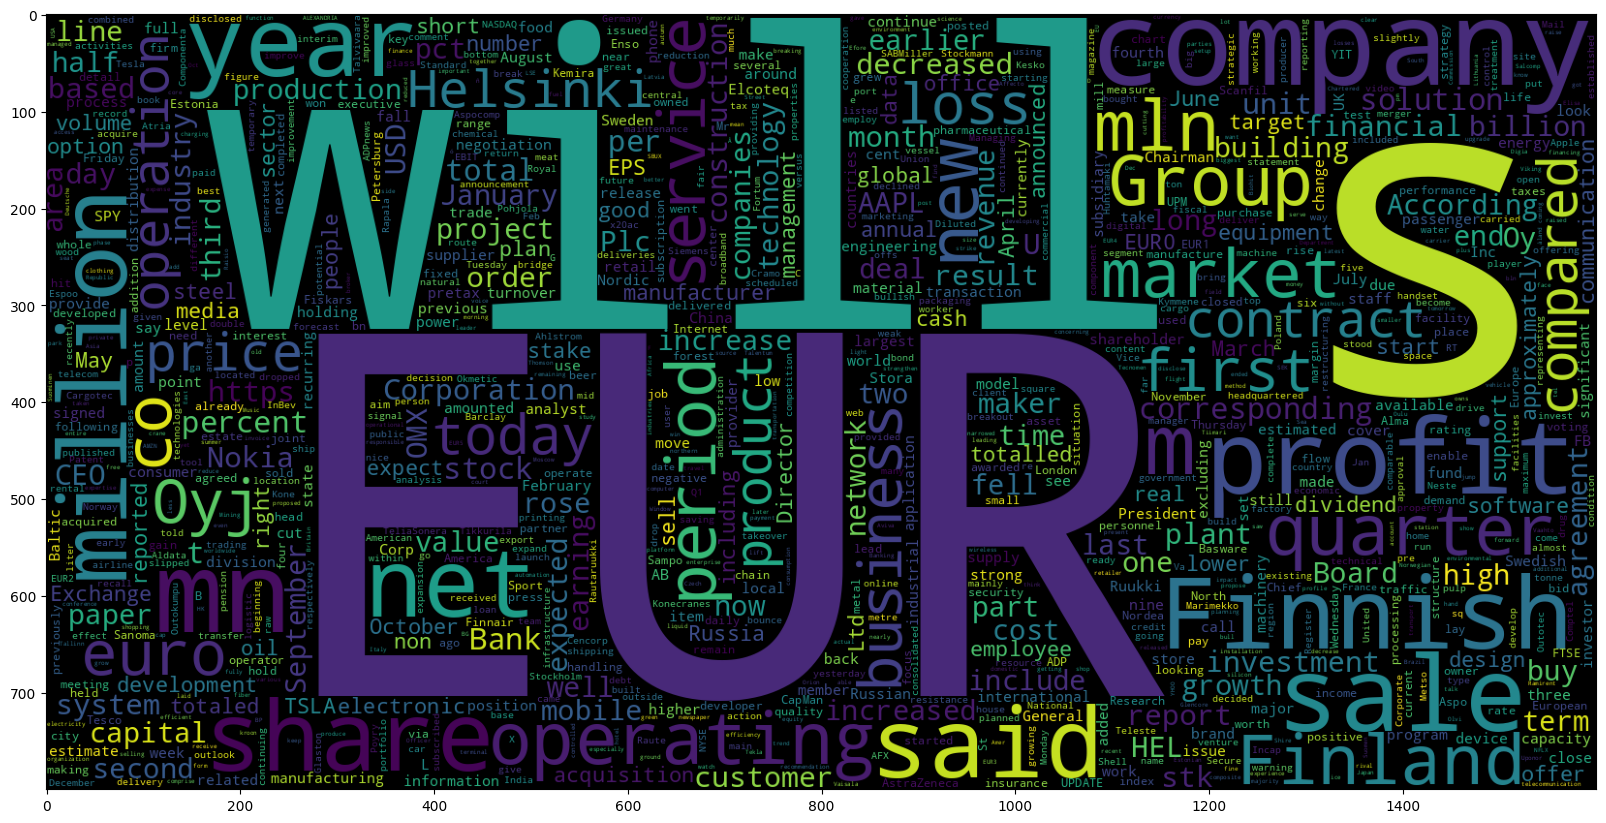

In [ ]:
data_neg = df['Sentence'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

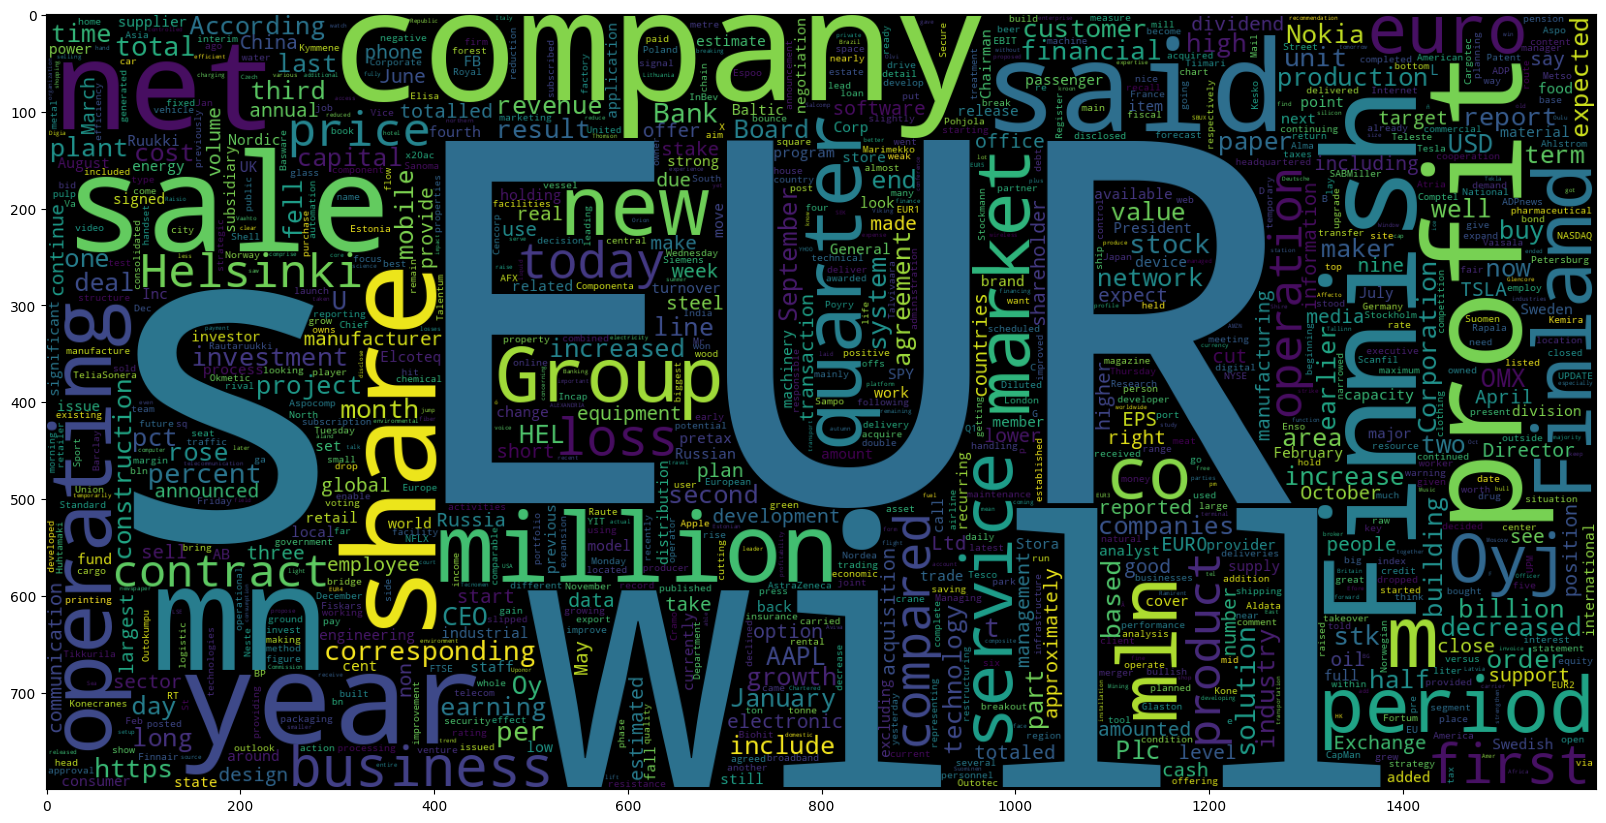

In [ ]:
from wordcloud import WordCloud
data_pos = df['Sentence'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Sentence,
    df.Sentiment,
    test_size=0.2,
    random_state=2022,
    stratify=df.Sentiment
)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4673,)
Shape of X_test:  (1169,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
model = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Logistic Regression', LogisticRegression())
])

In [ ]:
model.fit(X_train, y_train)


Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('Logistic Regression', LogisticRegression())])

In [ ]:
y_pred=model.predict(X_test)
y_pred

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [ ]:
new=["Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 "]
y_pred1=model.predict(new)
y_pred1

array(['positive'], dtype=object)